In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
!unzip data.zip

Archive:  data.zip
   creating: data/beach/
  inflating: data/beach/beach01.jpg  
  inflating: data/beach/beach02.jpg  
  inflating: data/beach/beach03.jpg  
  inflating: data/beach/beach04.jpg  
   creating: data/beach_with_tree/
  inflating: data/beach_with_tree/tree01.jpg  
  inflating: data/beach_with_tree/tree02.jpg  
  inflating: data/beach_with_tree/tree03.jpg  
  inflating: data/beach_with_tree/tree04.jpg  
  inflating: data/beach_with_tree/tree05.jpg  
   creating: data/cat/
  inflating: data/cat/cat01.jpg      
  inflating: data/cat/cat02.jpg      
   creating: data/cat/orange/
  inflating: data/cat/orange/cat01.jpg  
  inflating: data/cat/orange/cat02.jpg  
  inflating: data/cat/orange/cat03.jpg  
  inflating: data/cat/orange/cat04.jpg  
  inflating: data/cat/orange/cat05.jpg  
  inflating: data/cat/orange/cat06.jpg  
  inflating: data/cat/orange/cat07.jpg  
  inflating: data/cat/orange/cat08.jpg  


In [2]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 
import cv2 
import utils 

%matplotlib inline 

# Simple neural network 

This notebook will build a simple neural network on flattened image data.  After assessing performance, we'll try out a conv net. 

## Load data 

In [3]:
import glob
imgs_filenames = glob.glob("data/cat/orange/*.jpg")
imgs_filenames

['data/cat/orange/cat04.jpg',
 'data/cat/orange/cat02.jpg',
 'data/cat/orange/cat07.jpg',
 'data/cat/orange/cat03.jpg',
 'data/cat/orange/cat01.jpg',
 'data/cat/orange/cat05.jpg',
 'data/cat/orange/cat06.jpg',
 'data/cat/orange/cat08.jpg']

In [4]:
w_size = 13

X, y = utils.imgs_to_dataset(imgs_filenames, squeeze=True, padding=w_size+2, window_size=w_size)
X.shape, y.shape 

((80000, 169), (80000, 3))

In [5]:
X = utils.normalize(X)
y = utils.normalize(y)

In [6]:
y_b = y[:, 0]
y_g = y[:, 1]
y_r = y[:, 2]

## Model building 

In [7]:
from tensorflow.keras.layers import Dense, InputLayer

In [14]:
# blue 
model_b = tf.keras.Sequential([ 
    Dense(250, input_shape=(w_size**2, ), activation='relu'), 
    Dense(100, activation='relu'), 
    Dense(1, activation='relu')
])

model_b.compile(optimizer='sgd', loss='mse')  


# green 
model_g = tf.keras.Sequential([ 
    Dense(250, input_shape=(w_size**2, ), activation='relu'), 
    Dense(100, activation='relu'), 
    Dense(1, activation='relu')
])

model_g.compile(optimizer='sgd', loss='mse')  


# red 
model_r = tf.keras.Sequential([ 
    Dense(250, input_shape=(w_size**2, ), activation='relu'), 
    Dense(100, activation='relu'), 
    Dense(1, activation='relu')
])

model_r.compile(optimizer='sgd', loss='mse')  

In [15]:
model_r.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 250)               42500     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 101       
Total params: 67,701
Trainable params: 67,701
Non-trainable params: 0
_________________________________________________________________


In [22]:
EPOCHS = 200 

history_b = model_b.fit(X, y_b, epochs=EPOCHS, verbose=2)
history_g = model_g.fit(X, y_g, epochs=EPOCHS, verbose=2)
history_r = model_r.fit(X, y_r, epochs=EPOCHS, verbose=2)

Epoch 1/200
2500/2500 - 2s - loss: 0.0037
Epoch 2/200
2500/2500 - 3s - loss: 0.0036
Epoch 3/200
2500/2500 - 3s - loss: 0.0036
Epoch 4/200
2500/2500 - 3s - loss: 0.0036
Epoch 5/200
2500/2500 - 3s - loss: 0.0036
Epoch 6/200
2500/2500 - 3s - loss: 0.0036
Epoch 7/200
2500/2500 - 3s - loss: 0.0036
Epoch 8/200
2500/2500 - 3s - loss: 0.0036
Epoch 9/200
2500/2500 - 3s - loss: 0.0036
Epoch 10/200
2500/2500 - 3s - loss: 0.0036
Epoch 11/200
2500/2500 - 3s - loss: 0.0036
Epoch 12/200
2500/2500 - 3s - loss: 0.0036
Epoch 13/200
2500/2500 - 3s - loss: 0.0036
Epoch 14/200
2500/2500 - 3s - loss: 0.0036
Epoch 15/200
2500/2500 - 3s - loss: 0.0035
Epoch 16/200
2500/2500 - 3s - loss: 0.0035
Epoch 17/200
2500/2500 - 3s - loss: 0.0035
Epoch 18/200
2500/2500 - 3s - loss: 0.0035
Epoch 19/200
2500/2500 - 3s - loss: 0.0035
Epoch 20/200
2500/2500 - 3s - loss: 0.0035
Epoch 21/200
2500/2500 - 3s - loss: 0.0035
Epoch 22/200
2500/2500 - 3s - loss: 0.0035
Epoch 23/200
2500/2500 - 3s - loss: 0.0035
Epoch 24/200
2500/25

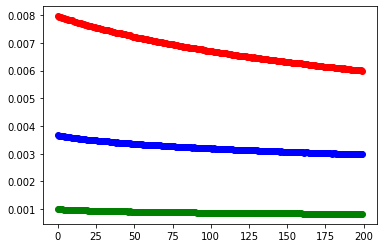

In [23]:
l_g = history_g.history['loss']
l_b = history_b.history['loss']
l_r = history_r.history['loss']

x_ = np.arange(len(l_g))
plt.scatter(x_, l_g, c='g') 
plt.scatter(x_, l_b, c='b') 
plt.scatter(x_, l_r, c='red') 


## Testing 

In [24]:
test_img_path = 'data/cat/orange/cat02.jpg'
test_img = utils.Image(test_img_path, padding=w_size+2)
X_test, _ = utils.img_to_dataset(test_img, window_size=w_size)  

y_pred_b = model_b.predict(X_test)
y_pred_g = model_g.predict(X_test)
y_pred_r = model_r.predict(X_test)

In [25]:
colored = utils.reconstruct_from_vectors(blue=y_pred_b, green=y_pred_g, 
                                         red=y_pred_r, dimension=100)
colored = utils.to_255_scale(colored)

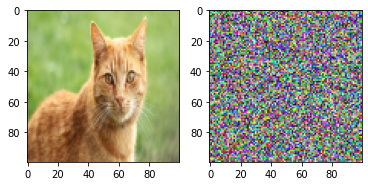

In [26]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(cv2.cvtColor(test_img.data_nopadding, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(colored.astype('uint8'), cv2.COLOR_BGR2RGB))

In [27]:
print(test_img.data_nopadding[10, 11, :])
print(colored[10, 11, :])

[104 189 156]
[228 182 196]


In [52]:
y_pred_b.sum()

0.0

In [53]:
y_pred_g.sum()

4.2777057

In [54]:
y_pred_r.sum()

7779.0005